## **2.6 Google Colab - Algoritmos de mejoramiento de imágenes basado por pixeles**

Los ejercicios que deben agregarse a este proyecto serán los siguientes:

1.   Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

2.   Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

3.   Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.


# **Names and IDs of team members:**

**Nombre Matrícula**

Félix Daniel Reyes López A01794458

Dante Cesar Cervantes Gutierrez A01794585

Ruben Guerrero del Fierro A01793005

Juan Manuel Carballo Montaño A01166758

# **Importing libraries**

In [1]:
!pip install image_slicer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-7.2.0-cp310-cp310-linux_x86_64.whl size=1140125 sha256=232d667796abb352ee5d8c6794527d23aa9c293f882b1c84538632ddba9c7674
  Stored in directory: /root/.cache/pip/wheels/fd/5c/a6/0ab3157e7e4a0ba139bd89cb1edbe0f87876cf55ef31b05d6a
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires pillow>=9.0.0, but you have pillow 7.2.0 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 7.2.0 which is incompatible.


In [2]:
import cv2
import skimage.io
import skimage.exposure
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import image_slicer
from image_slicer import join


from skimage import data
from skimage.filters import rank
from skimage.morphology import disk
from matplotlib import image as mpimg
from google.colab.patches import cv2_imshow

# **Loading images from Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/ComputerVision/Activities/2.6"
os.chdir(DIR)

# **Ejercicio 1:**
**Aplicacion de Ecualizacion de Histogramas en partes**



Source https://code.tutsplus.com/histogram-equalization-in-python--cms-30202t

**Aplicar Metodo tile-based histogram equalization con una division de la imagen en 4 partes:**

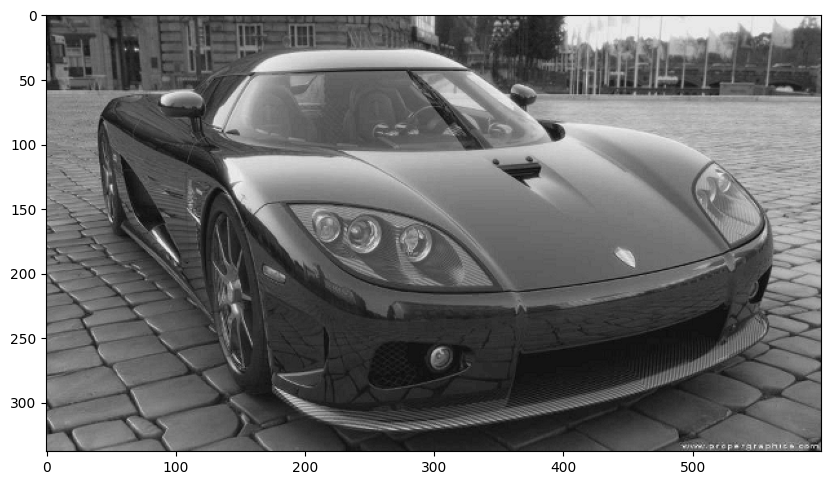

In [5]:
#Lectura de la imagen
img_car = cv2.imread("Images/Car_Black.png", 0)
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.imshow(img_car, cmap='gray')


In [6]:
#Lectura de la imagen
img = 'Images/Car_Black.png'
num_tiles = 4
#Divicion de la impagen en 4 partes
tiles = image_slicer.slice(img, num_tiles)

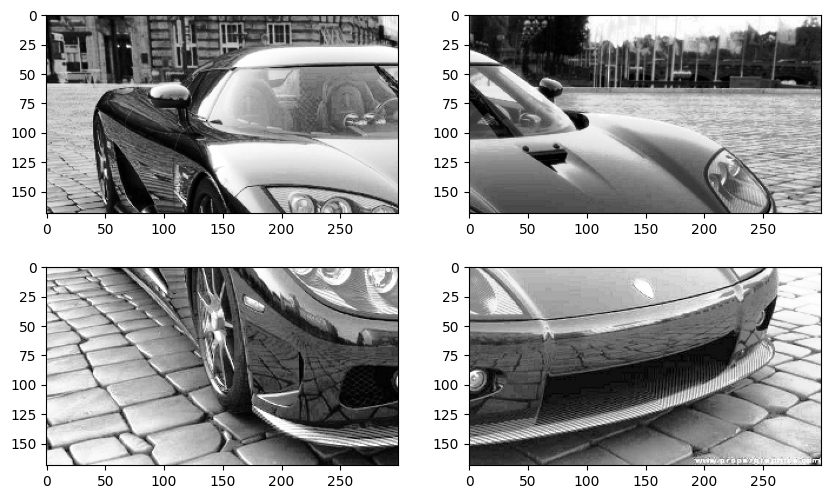

In [7]:
#Lectura de la imagen
i=0
figsize = (10, 6)
plt.figure(figsize=figsize)
#Bucle para realizar la ecualizacion de histograma en cada parte
for tile in tiles:
  img_tmp = cv2.imread(tiles[i].filename, 0)

  #Aplicacion de la ecualizacion de histograma
  eq_GS = cv2.equalizeHist(img_tmp)

  #Se guarda la nueva imagen en el tile
  tile = eq_GS

  #Acomodo de las partes
  plt.subplot(2,2,i+1)

  #Muestra cada parte
  plt.imshow((tile), cmap='gray')

  #Se guarda imagen
  cv2.imwrite(tiles[i].filename, tile)
  i=i+1

**Aplicar Metodo ahora con una division de la imagen en 9 partes:**

In [8]:
#Ubicacion del archivo
img = 'Images/Car_Black.png'
num_tiles = 9
#Divicion de la imagen en 9 partes
tiles = image_slicer.slice(img, num_tiles)

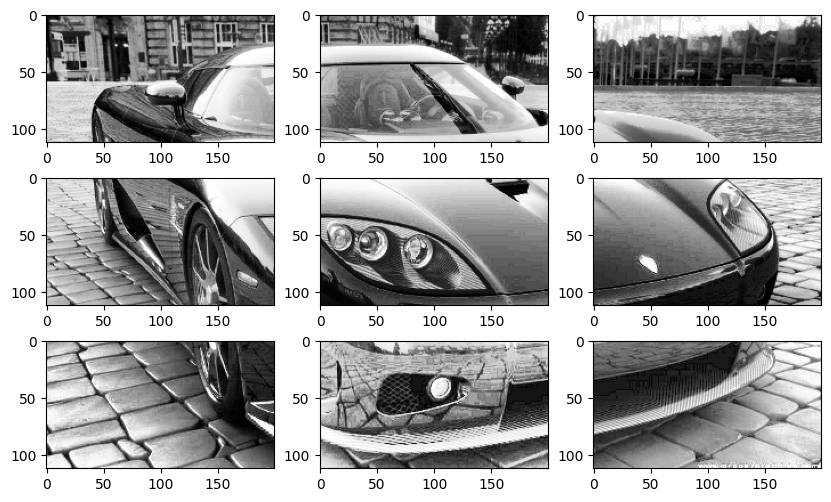

In [9]:
i=0
#Configuracion del tamaño para mostrar las partes
figsize = (10, 6)
plt.figure(figsize=figsize)
#Bucle para aplicar Ecualizacion de Histograma a cada parte
for tile in tiles:
  img_tmp = cv2.imread(tiles[i].filename, 0)
  #Aplicacion de Ecualizacion de Histograma
  eq_GS = cv2.equalizeHist(img_tmp)
  tile = eq_GS
  #Acomodo de las partes
  plt.subplot(3,3,i+1)
  #Aplicacion de escala de grices
  plt.imshow((tile), cmap='gray')
  i=i+1

**¿cómo podría mejorarse?**

Cuando se aplica por separado, algunas partes, puede parecer que tienen una mejora muy buena, pero al compararla con todas las partes, puede que el mejoramiento fue demasiado, por lo que se pudiera mejorar si los valores de cada cuadro que se mejoró se compartieran los resultados y obtener un promedio entre partes o regiones para que las partes mejoradas no tengan una diferencia tan drástica y fuera más tenue.


Fuentes:
Adaptive Histogram Equalization in Python.
https://stackoverflow.com/questions/43569566/adaptive-histogram-equalization-in-python

Efficiently splitting an image into tiles in Python using NumPy. https://towardsdatascience.com/efficiently-splitting-an-image-into-tiles-in-python-using-numpy-d1bf0dd7b6f7


# **Ejercicio 2**

In [10]:
def sliding_window_adaptive_histogram_equalization(image, window_size):
  """Simple Implmentation of the SWAHE algorithm using only grayscale values

  Args:
      image (np.ndarray): image in gray scale
      window_size (tuple2): a tuple for creating the sliding window

  Returns:
      np.ndarray: the return image
  """
  rows, cols = image.shape
  # Creates the output image with zeros
  output_image = np.zeros_like(image)

  # Create a Window Matrix
  window = np.ones(window_size)

  # Create the window sliding matrices
  local_hist = rank.windowed_histogram(image, window, n_bins=256)

  # iterate over the rows and cols of an image
  for i in range(rows):
    for j in range(cols):
      # create the cumulative distribution function for the local histogram
      cdf = np.cumsum(local_hist[i,j,:]) / np.sum(local_hist[i,j,:])
      # search in the cdf for the image intensity and i,j and multiply by 255
      output_image[i, j] = cdf[image[i,j]] * 255

  return output_image

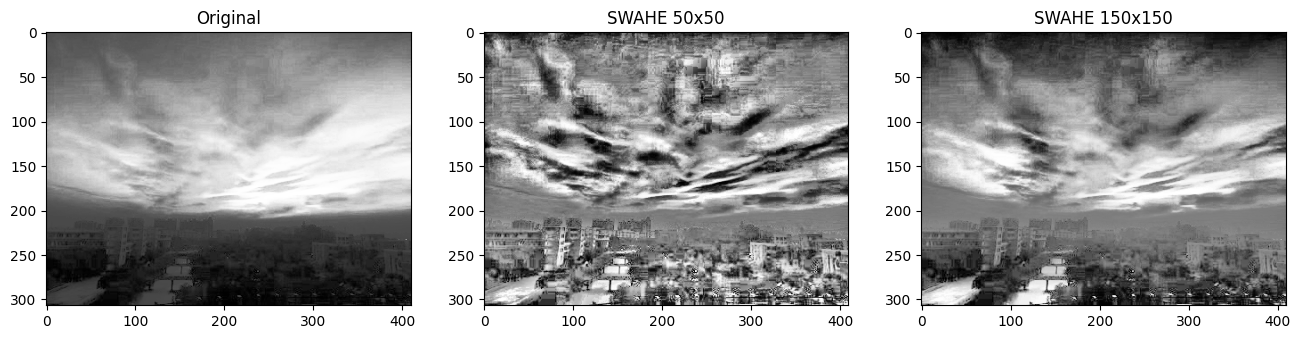

In [11]:
img = cv2.imread('Images/image4.bmp', cv2.IMREAD_GRAYSCALE)

res1 = sliding_window_adaptive_histogram_equalization(img, (50,50))
res2 = sliding_window_adaptive_histogram_equalization(img, (150,150))

fig, axes = plt.subplots(1,3, figsize=(16,10))

axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray')
axes[1].set_title("SWAHE 50x50")
axes[1].imshow(res1, cmap='gray')
axes[2].set_title("SWAHE 150x150")
axes[2].imshow(res2, cmap='gray')

**Explicacion:**

La funcion skimage.exposure.equalize_adapthist es utilizado para mejorar el contraste aplicando la ecualizacion de histograma en regiones.

skimage.exposure.equalize_adapthist(image, **kernel_size=8**, **clip_limit=0.01**)


*   kernel_size.- define las formas de las regiones sobre las que se aplicara la ecualizacion de imagenes
*   clip_limit.- se agrega un limite de recorte


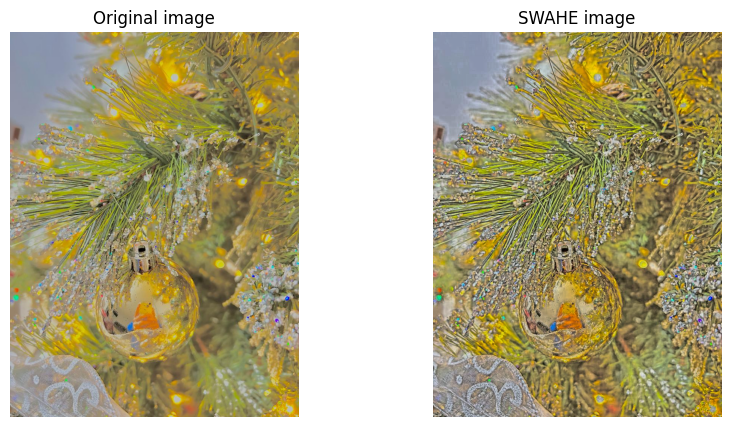

In [12]:
# Import the libraries
import matplotlib.pyplot as plt
import skimage.io
import skimage.exposure

# Read the image
image = skimage.io.imread('Images/test.jpg')

# Apply SWAHE with a window size of 8 and a clip limit of 0.01
swahe_image = skimage.exposure.equalize_adapthist(image, kernel_size=8, clip_limit=0.01)

# Plot the original and the enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(swahe_image, cmap='gray')
plt.title('SWAHE image')
plt.axis('off')
plt.show()


# **Ejercicio 3**

Explicacion

Contrast Limited Adaptive Histogram Equalization (CLAHE)

Para evitar que la ecualización general de una imagen provoque una soprexposición de la misma, se aplica una ecualización adaptiva, es decir, parte la imagen en pequeños cuadros de 8x8 y a este aplica la ecualización general, sin embargo, si la imagen contiene ruido, puede verse amplificado.

Para esto, se aplica una limitación en el contraste, es decir, si cualquier rango del histograma está por encima del límite de contraste (por defecto es 40 en OpenCV), esos píxeles son distribuidos uniformemente a otros rangos antes de aplicar la ecualización.

[1] Histograms - 2: Histogram Equalization (n.d.) Recuperado enero 20, 2024, de https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html



In [13]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA-ImageProcessing"
#os.chdir(DIR)

In [14]:
# Función Clahe

def fnClahe(imgnm, imgsv):
  img = cv2.imread('Images/' + imgnm,cv2.IMREAD_GRAYSCALE)
  assert img is not None, "No se encontró la imagen señalada."

  equ = cv2.equalizeHist(img)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_clahe = clahe.apply(img)

  fig, ((ax0, ax1, ax2), (ax3, ax4, ax5) ) = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
  ax0.hist(img.flat, bins=100, range=(0, 255))
  ax0.set_title('Histograma original')

  ax1.hist(equ.flat, bins=100, range=(0, 255))
  ax1.set_title('Histograma ecualización')

  ax2.hist(img_clahe.flat, bins=100, range=(0, 255))
  ax2.set_title('Histograma CLAHE')

  ax3.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax3.set_title('Imagen original')
  ax3.axis('off')

  ax4.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
  ax4.set_title('Imagen ecualización')
  ax4.axis('off')

  ax5.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
  ax5.set_title('Imagen CLAHE')
  ax5.axis('off')

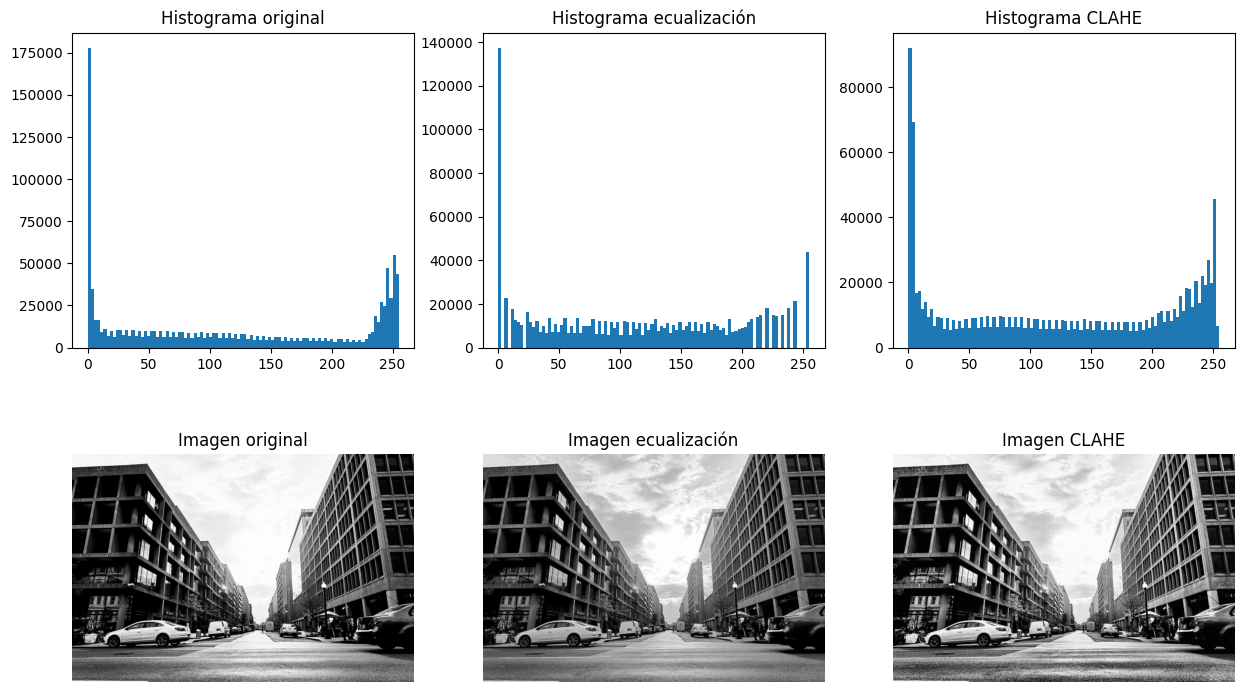

In [15]:
fnClahe('original3.jpg', 'clahe_1')

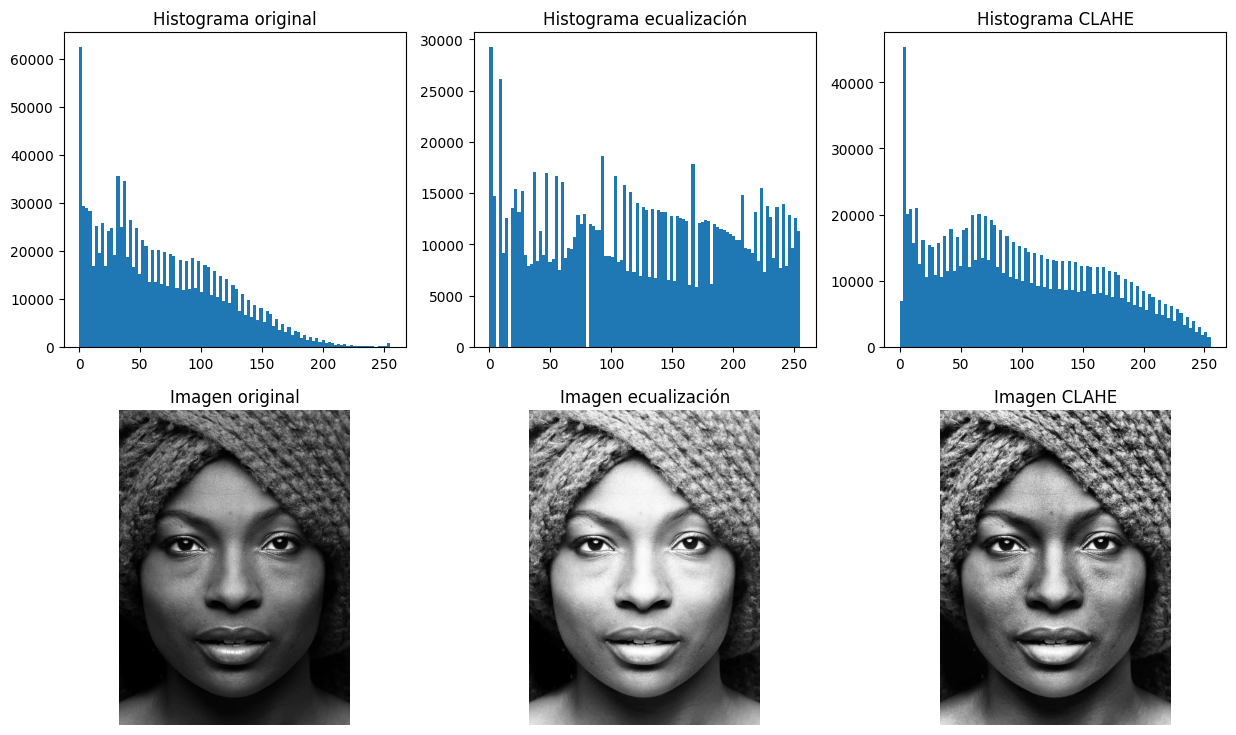

In [16]:
fnClahe('original4.jpg', 'clahe_2')

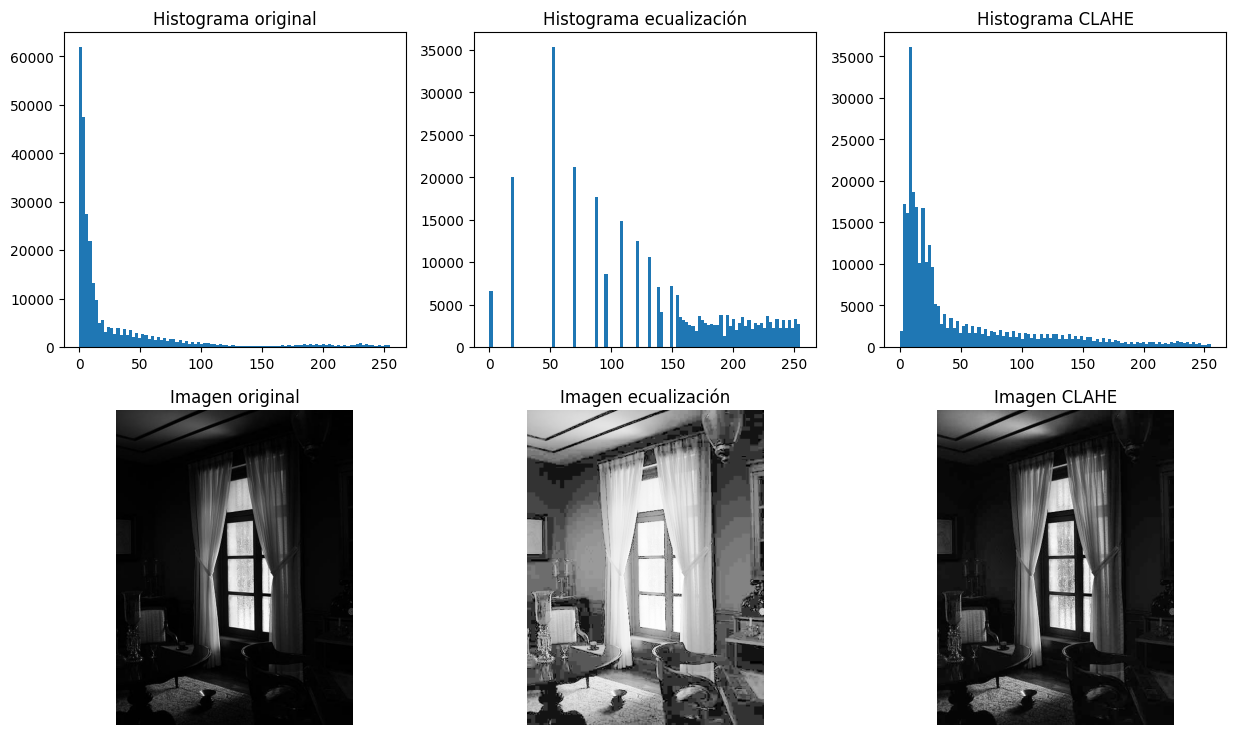

In [17]:
fnClahe('original5.jpg', 'clahe_3')

## **Bibliografias:**

[1] https://docs.opencv.org/4.9.0/d0/d86/tutorial_py_image_arithmetics.html